**Video-Classification**

Use different model architecture to compare the results for the ISRO datasets.
1. InceptionV3 network
2. MobileNet
3. ResNet-50




In [1]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-uan_saib
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-uan_saib
  Resolved https://github.com/tensorflow/docs to commit c40e0e812c9552e1f9c9afc6e9af4cd41e488c9c
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2023.9.4.19335-py3-none-any.whl size=184104 sha256=93c5abb1078b2f0bb180d8be86bd55868f5b6dd0907bda18f8b2f119754c2dd3
  Stored in directory: /tmp/pip-ephem-wheel-cache-pzcr90b0/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [2]:
from tensorflow_docs.vis import embed
from tensorflow import keras
from imutils import paths

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os
import csv
import shutil
import random
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, GRU, Dense, Masking, Dropout, Average, Maximum
from tensorflow.keras.models import Model
from tensorflow.keras.activations import sigmoid, relu, tanh, softmax
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense, Input, Masking
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from IPython.display import Image

In [3]:
# Mount Google drive
from google.colab import drive  #Import the required library

drive.mount("/content/gdrive")

Mounted at /content/gdrive


The drive is mounted so that the new folder created is stored in the same drive link

In [4]:
%cd "/content/gdrive/MyDrive"

/content/gdrive/MyDrive


In [5]:
# Go to MyDrive folder - Video-Metadata-classification folder
%cd "/content/gdrive/MyDrive/Video-Metadata-Classification"

/content/gdrive/MyDrive/Video-Metadata-Classification


In [6]:
# make directory - videoClassification
import os

if not os.path.isdir("ISRO-VideoClassification"):
  os.makedirs("ISRO-VideoClassification")

In [7]:
# Move to ISRO-ObjectDetection folder
%cd ISRO-VideoClassification

/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification


In [ ]:
#Load Dataset
import zipfile
import os
zip_file_path = 'CNN-Video-Classification-LSTM.zip'
extraction_dir = 'Labeled-Dataset'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extraction_dir):
    os.makedirs(extraction_dir)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extraction_dir)

In [8]:
#Find the number of videos in the folder
folder_path_launch = '/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/CNN-Video-Classification-LSTM/Launch'
folder_path_logo = '/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/CNN-Video-Classification-LSTM/Logo'
folder_path_person ='/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/CNN-Video-Classification-LSTM/Person-Close-Up'
# Get a list of all files in the folder
files_launch = [f for f in os.listdir(folder_path_launch) if os.path.isfile(os.path.join(folder_path_launch, f))]
files_logo = [f for f in os.listdir(folder_path_logo) if os.path.isfile(os.path.join(folder_path_logo, f))]
files_person = [f for f in os.listdir(folder_path_person) if os.path.isfile(os.path.join(folder_path_person, f))]
# Get the number of files in the folder
number_of_files_launch = len(files_launch)
number_of_files_logo = len(files_logo)
number_of_files_person = len(files_person)

print(f'Number of files in the folder in Launch folder : {number_of_files_launch}')
print(f'Number of files in the folder in Logo folder : {number_of_files_logo}')
print(f'Number of files in the folder in Person-Close-Up folder : {number_of_files_person}')


Number of files in the folder in Launch folder : 70
Number of files in the folder in Logo folder : 70
Number of files in the folder in Person-Close-Up folder : 70


In [9]:
#Find the labels
# Get a list of all subdirectories (folder names) in the extraction directory
extraction_dir = '/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/CNN-Video-Classification-LSTM'
subdirectories = [d for d in os.listdir(extraction_dir) if os.path.isdir(os.path.join(extraction_dir, d))]

class_labels = sorted(list(set(subdirectories)))
label2id = {label: i for i, label in enumerate(class_labels)}
id2label = {i: label for label, i in label2id.items()}

print(f"Unique classes: {list(label2id.keys())}.")

Unique classes: ['Launch', 'Logo', 'Person-Close-Up', 'test', 'train'].


In [ ]:
# Create a CSV file from CNN-Video-Classification-LSTM
# Create a list to store the video file paths and their associated tags
video_data = []

# Iterate through the folder and its subfolders
for root, dirs, files in os.walk(extraction_dir):
    for file in files:
        if file.endswith('.mp4'):  # You can adjust the file extension to match your video format
            folder_name = os.path.basename(root)  # Get the folder name as the tag
            video_path = os.path.join(root, file)  # Get the full video path
            video_data.append((folder_name, video_path))

# Specify the output CSV file
csv_file_path = '/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/dataset.csv'

# Write the video data to the CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Tag', 'VideoPath'])  # Write header row
    csv_writer.writerows(video_data)  # Write video data

print(f'CSV file "{csv_file_path}" has been created with video paths and tags.')

CSV file "/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/dataset.csv" has been created with video paths and tags.


In [10]:
dataset_df = pd.read_csv("/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/dataset.csv")
print(f"Total videos in the dataset: {len(dataset_df)}")


dataset_df.sample(5)

Total videos in the dataset: 210


,Tag,VideoPath
96,Logo,/content/gdrive/MyDrive/Video-Metadata-Classif...
57,Launch,/content/gdrive/MyDrive/Video-Metadata-Classif...
112,Logo,/content/gdrive/MyDrive/Video-Metadata-Classif...
65,Launch,/content/gdrive/MyDrive/Video-Metadata-Classif...
124,Logo,/content/gdrive/MyDrive/Video-Metadata-Classif...


In [11]:
#Label Encoding
label_processor = keras.layers.StringLookup(num_oov_indices=0, vocabulary=np.unique(dataset_df["Tag"]))
print(label_processor.get_vocabulary())

labels = dataset_df["Tag"].values
labels = label_processor(labels[..., None]).numpy()

['Launch', 'Logo', 'Person-Close-Up']


In [12]:
print("Encoded Labels - " , labels)

Encoded Labels -  [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [

Feed Videos to the network

here the image size is considered as 224 x 224

In [13]:
#Feed videos to a network
IMG_SIZE = 224

def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

MobileNet Architecture
1. Build a feature extractor
2. Extract the features from the custom dataset
3. prepare videos

In [14]:
#Feature Extractor
def build_feature_extractor():
    feature_extractor = keras.applications.MobileNetV2(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.mobilenet_v2.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")

In [15]:
# layers of mobileNet Architecture
feature_extractor_mobile_net = build_feature_extractor()

feature_extractor_mobile_net.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
Total params: 2257984 (8.61 MB)
Trainable params: 22

In [ ]:
def train_test_split(dataset_dir, train_ratio=0.8, random_seed=None):
    if random_seed is not None:
        random.seed(random_seed)

    # Create directories for training and testing data
    train_dir = os.path.join(dataset_dir, "train")
    test_dir = os.path.join(dataset_dir, "test")
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Get a list of class subdirectories
    class_dirs = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

    for class_dir in class_dirs:
        # Create subdirectories for each class in the training and testing sets
        train_class_dir = os.path.join(train_dir, class_dir)
        test_class_dir = os.path.join(test_dir, class_dir)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # Get a list of video files in the class directory
        video_files = [f for f in os.listdir(os.path.join(dataset_dir, class_dir)) if f.endswith(".mp4")]

        # Shuffle the list of video files
        random.shuffle(video_files)

        # Determine the split point
        split_point = int(len(video_files) * train_ratio)

        # Copy videos to the training and testing directories
        for i, video_file in enumerate(video_files):
            source_path = os.path.join(dataset_dir, class_dir, video_file)
            if i < split_point:
                destination_path = os.path.join(train_class_dir, video_file)
            else:
                destination_path = os.path.join(test_class_dir, video_file)
            shutil.copy(source_path, destination_path)

    return train_dir, test_dir

train_dir, test_dir = train_test_split(extraction_dir, train_ratio=0.8, random_seed=42)

In [ ]:
# Get the Train.csv and test.csv
video_data = []

# Iterate through the folder and its subfolders
for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.endswith('.mp4'):  # You can adjust the file extension to match your video format
            folder_name = os.path.basename(root)  # Get the folder name as the tag
            video_path = os.path.join(root, file)  # Get the full video path
            video_data.append((folder_name, video_path))

# Specify the output CSV file
csv_file_path = '/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/train.csv'

# Write the video data to the CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Tag', 'VideoPath'])  # Write header row
    csv_writer.writerows(video_data)  # Write video data

print(f'CSV file "{csv_file_path}" has been created with video paths and tags.')

CSV file "/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/train.csv" has been created with video paths and tags.


In [16]:
train_df = pd.read_csv("/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/train.csv")
print(f"Total videos in the train dataset: {len(train_df)}")


train_df.sample(5)

Total videos in the train dataset: 168


,Tag,VideoPath
129,Person-Close-Up,/content/gdrive/MyDrive/Video-Metadata-Classif...
49,Launch,/content/gdrive/MyDrive/Video-Metadata-Classif...
72,Logo,/content/gdrive/MyDrive/Video-Metadata-Classif...
20,Launch,/content/gdrive/MyDrive/Video-Metadata-Classif...
123,Person-Close-Up,/content/gdrive/MyDrive/Video-Metadata-Classif...


In [ ]:
video_data_test = []

# Iterate through the folder and its subfolders
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith('.mp4'):  # You can adjust the file extension to match your video format
            folder_name = os.path.basename(root)  # Get the folder name as the tag
            video_path = os.path.join(root, file)  # Get the full video path
            video_data_test.append((folder_name, video_path))

# Specify the output CSV file
csv_file_path_test = '/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/test.csv'

# Write the video data to the CSV file
with open(csv_file_path_test, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Tag', 'VideoPath'])  # Write header row
    csv_writer.writerows(video_data_test)  # Write video data

print(f'CSV file "{csv_file_path_test}" has been created with video paths and tags.')

CSV file "/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/test.csv" has been created with video paths and tags.


In [17]:
test_df = pd.read_csv("/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/test.csv")
print(f"Total videos in the test dataset: {len(test_df)}")


test_df.sample(5)

Total videos in the test dataset: 42


,Tag,VideoPath
30,Person-Close-Up,/content/gdrive/MyDrive/Video-Metadata-Classif...
32,Person-Close-Up,/content/gdrive/MyDrive/Video-Metadata-Classif...
5,Launch,/content/gdrive/MyDrive/Video-Metadata-Classif...
11,Launch,/content/gdrive/MyDrive/Video-Metadata-Classif...
21,Logo,/content/gdrive/MyDrive/Video-Metadata-Classif...


In [18]:
# Constants for the
MAX_SEQ_LENGTH = 20  # Maximum sequence length
NUM_FEATURES = 1280  # Number of features extracted from frames
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["VideoPath"].values.tolist()

    ##take all classlabels from train_df column named 'tag' and store in labels
    labels = df["Tag"].values

    #convert classlabels to label encoding
    labels = label_processor(labels[..., None]).numpy()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool") # 145,20
    frame_features = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32") #145,20,2048

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor_mobile_net.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels

In [19]:
train_data_mobileNet, train_labels_mobileNet = prepare_all_videos(train_df, "dataset")

1/1 [==============================] - 0s 43ms/step


In [20]:
print(f"Frame features in Train dateset: {train_data_mobileNet[0].shape}")
print(f"Frame masks in Train dataset: {train_data_mobileNet[1].shape}")

Frame features in Train dateset: (168, 20, 1280)
Frame masks in Train dataset: (168, 20)


In [21]:
# Prepare videos for test-dataset as well
test_data_mobileNet, test_labels_mobileNet = prepare_all_videos(test_df, "dataset")


1/1 [==============================] - 0s 19ms/step


In [22]:
print(f"Frame features in Test dateset: {test_data_mobileNet[0].shape}")
print(f"Frame masks in Test dataset: {test_data_mobileNet[1].shape}")

Frame features in Test dateset: (42, 20, 1280)
Frame masks in Test dataset: (42, 20)


In [23]:
def build_and_train_lstm_model(train_frame_features, train_frame_mask, train_labels,
                                test_frame_features, test_frame_mask, test_labels,
                                num_classes=3, max_seq_length=20, num_features=1280,
                                num_epochs=50, batch_size=32, learning_rate=0.001):
    # Set random seed for reproducibility
    seed_value = 42
    tf.random.set_seed(seed_value)

    # Define inputs
    frame_features_input = Input(shape=(max_seq_length, num_features), name="frame_features_input")
    frame_mask_input = Input(shape=(max_seq_length,), dtype=tf.bool, name="frame_mask_input")

    # Apply masking to frame features
    masked_frame_features = Masking(mask_value=0.0)(frame_features_input)

    # LSTM layers
    lstm_layer = LSTM(64, return_sequences=True)(masked_frame_features)
    lstm_layer = LSTM(32)(lstm_layer)

    # Output layer
    output_layer = Dense(num_classes, activation='softmax')(lstm_layer)

    # Create the model
    model = Model(inputs=[frame_features_input, frame_mask_input], outputs=output_layer)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Print the model summary
    model.summary()

    # Train the model
    history = model.fit([train_frame_features, train_frame_mask], train_labels,
                        validation_split=0.15,  # Adjust the validation split as needed
                        epochs=num_epochs,  # Adjust the number of epochs as needed
                        batch_size=batch_size,  # Adjust batch size as needed
                        verbose=1)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate([test_frame_features, test_frame_mask], test_labels)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 frame_features_input (Inpu  [(None, 20, 1280)]           0         []                            
 tLayer)                                                                                          
                                                                                                  
 masking (Masking)           (None, 20, 1280)             0         ['frame_features_input[0][0]']
                                                                                                  
 lstm (LSTM)                 (None, 20, 64)               344320    ['masking[0][0]']             
                                                                                                  
 lstm_1 (LSTM)               (None, 32)                   12416     ['lstm[0][0]']            

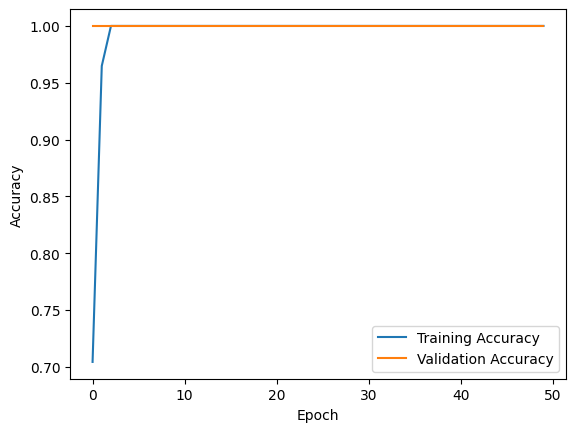

In [24]:
lstm_model = build_and_train_lstm_model(train_data_mobileNet[0], train_data_mobileNet[1],  train_labels_mobileNet,
                                   test_data_mobileNet[0], test_data_mobileNet[0], test_labels_mobileNet)

In [ ]:
# save the model in a folder path
folder_path = "/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/Trained-Model/lstm_model_mobile_net.h5"
lstm_model.save(folder_path,save_format="h5")

In [ ]:
video_data_infer = []

infer_dir = '/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/Test-Video-For classification'

# Iterate through the folder and its subfolders
for root, dirs, files in os.walk(infer_dir):
    for file in files:
        if file.endswith('.mp4'):  # You can adjust the file extension to match your video format
            folder_name = os.path.basename(root)  # Get the folder name as the tag
            video_path = os.path.join(root, file)  # Get the full video path
            video_data_infer.append((folder_name, video_path))

# Specify the output CSV file
csv_file_path_infer = '/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/infer.csv'

# Write the video data to the CSV file
with open(csv_file_path_infer, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Tag', 'VideoPath'])  # Write header row
    csv_writer.writerows(video_data_infer)  # Write video data

print(f'CSV file "{csv_file_path_infer}" has been created with video paths and tags.')

CSV file "/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/infer.csv" has been created with video paths and tags.


In [25]:
infer_df = pd.read_csv("/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/infer.csv")
print(f"Total videos in the infer dataset: {len(infer_df)}")


infer_df

Total videos in the infer dataset: 1


,Tag,VideoPath
0,Test-Video-For classification,/content/gdrive/MyDrive/Video-Metadata-Classif...


In [26]:
MAX_SEQ_LENGTH = 20  # Maximum sequence length
NUM_FEATURES = 1280  # Number of features extracted from frames
def prepare_all_videos_inference(df, root_dir):
    num_samples = len(df)
    video_paths = df["VideoPath"].values.tolist()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool") # 145,20
    frame_features = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32") #145,20,2048

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor_mobile_net.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return frame_features, frame_masks


In [27]:
# Prepare videos for test-dataset as well
infer_data_mobileNet, infer_mask_mobileNet = prepare_all_videos_inference(infer_df, "dataset")

1/1 [==============================] - 0s 39ms/step


In [28]:
print(f"Frame features in inference dateset: {infer_data_mobileNet.shape}")
print(f"Frame masks in inference dataset: {infer_mask_mobileNet.shape}")

Frame features in inference dateset: (1, 20, 1280)
Frame masks in inference dataset: (1, 20)


In [29]:
# Load the trained model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/Trained-Model/lstm_model_mobile_net.h5')  # Replace 'model_path' with the actual path to your trained model

# Perform inference with the model
predictions = model.predict([infer_data_mobileNet,infer_mask_mobileNet])

# Get the class label with the highest probability
predicted_class = np.argmax(predictions)

# Assuming you have a list of class labels, get the class name
class_labels = ['Launch', 'Logo', 'Person-Close-Up']  # Replace with your actual class labels
predicted_class_name = class_labels[predicted_class]

print(f'Predicted Class: {predicted_class_name}')

1/1 [==============================] - 2s 2s/step
Predicted Class: Launch


Build feature extractor InceptionV3 network architecture

In [ ]:
#Feature Extraction
def build_feature_extractor_inception():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")

In [ ]:
#InceptionV3 Feature Extractor Model
feature_extractor_inceptionV3_net = build_feature_extractor_inception()

feature_extractor_inceptionV3_net.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
Total params: 21802784 (83.17 MB)
Trainable params: 21768352 (83.04 MB)
Non-trainable params: 34432 (134.50 KB)
____

In [ ]:
# Constants for the
MAX_SEQ_LENGTH = 20  # Maximum sequence length
NUM_FEATURES = 2048  # Number of features extracted from frames
def prepare_all_videos_inception(df, root_dir):
    num_samples = len(df)
    video_paths = df["VideoPath"].values.tolist()

    ##take all classlabels from train_df column named 'tag' and store in labels
    labels = df["Tag"].values

    #convert classlabels to label encoding
    labels = label_processor(labels[..., None]).numpy()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool") # 145,20
    frame_features = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32") #145,20,2048

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor_inceptionV3_net.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels

In [ ]:
train_data_inceptionNet, train_labels_inceptionNet = prepare_all_videos_inception(train_df, "dataset")

1/1 [==============================] - 0s 128ms/step


In [ ]:
print(f"Frame features in Train dateset: {train_data_inceptionNet[0].shape}")
print(f"Frame masks in Train dataset: {train_data_inceptionNet[1].shape}")

Frame features in Train dateset: (168, 20, 2048)
Frame masks in Train dataset: (168, 20)


In [ ]:
# Prepare videos for test-dataset as well
test_data_inceptionNet, test_labels_inceptionNet = prepare_all_videos_inception(test_df, "dataset")

1/1 [==============================] - 0s 132ms/step


In [ ]:
print(f"Frame features in test dateset: {test_data_inceptionNet[0].shape}")
print(f"Frame masks in test dataset: {test_data_inceptionNet[1].shape}")

Frame features in test dateset: (42, 20, 2048)
Frame masks in test dataset: (42, 20)


In [ ]:
def build_and_train_lstm_model_inception(train_frame_features, train_frame_mask, train_labels,
                                test_frame_features, test_frame_mask, test_labels,
                                num_classes=3, max_seq_length=20, num_features=2048,
                                num_epochs=50, batch_size=32, learning_rate=0.001):
    # Set random seed for reproducibility
    seed_value = 42
    tf.random.set_seed(seed_value)

    # Define inputs
    frame_features_input = Input(shape=(max_seq_length, num_features), name="frame_features_input")
    frame_mask_input = Input(shape=(max_seq_length,), dtype=tf.bool, name="frame_mask_input")

    # Apply masking to frame features
    masked_frame_features = Masking(mask_value=0.0)(frame_features_input)

    # LSTM layers
    lstm_layer = LSTM(64, return_sequences=True)(masked_frame_features)
    lstm_layer = LSTM(32)(lstm_layer)

    # Output layer
    output_layer = Dense(num_classes, activation='softmax')(lstm_layer)

    # Create the model
    model = Model(inputs=[frame_features_input, frame_mask_input], outputs=output_layer)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Print the model summary
    model.summary()

    # Train the model
    history = model.fit([train_frame_features, train_frame_mask], train_labels,
                        validation_split=0.15,  # Adjust the validation split as needed
                        epochs=num_epochs,  # Adjust the number of epochs as needed
                        batch_size=batch_size,  # Adjust batch size as needed
                        verbose=1)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate([test_frame_features, test_frame_mask], test_labels)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return model

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 frame_features_input (Inpu  [(None, 20, 2048)]           0         []                            
 tLayer)                                                                                          
                                                                                                  
 masking_1 (Masking)         (None, 20, 2048)             0         ['frame_features_input[0][0]']
                                                                                                  
 lstm_2 (LSTM)               (None, 20, 64)               540928    ['masking_1[0][0]']           
                                                                                                  
 lstm_3 (LSTM)               (None, 32)                   12416     ['lstm_2[0][0]']        

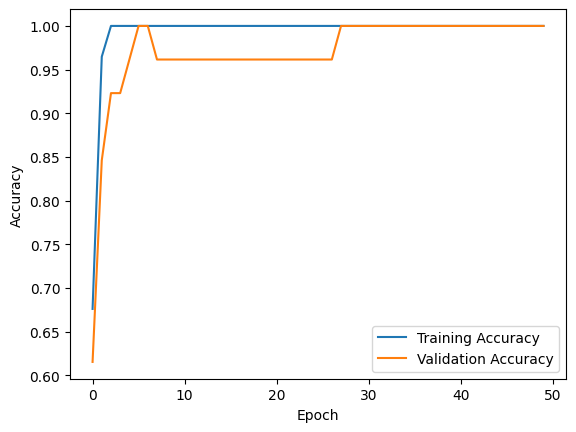

In [ ]:
lstm_model_inception = build_and_train_lstm_model_inception(train_data_inceptionNet[0], train_data_inceptionNet[1],  train_labels_inceptionNet,
                                   test_data_inceptionNet[0], test_data_inceptionNet[0], test_labels_inceptionNet)

In [ ]:
# save the model in a folder path
folder_path = "/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/Trained-Model/lstm_model_inception_net.h5"
lstm_model_inception.save(folder_path,save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
MAX_SEQ_LENGTH = 20  # Maximum sequence length
NUM_FEATURES = 2048  # Number of features extracted from frames
def prepare_all_videos_inference_inception(df, root_dir):
    num_samples = len(df)
    video_paths = df["VideoPath"].values.tolist()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool") # 145,20
    frame_features = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32") #145,20,2048

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor_inceptionV3_net.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return frame_features, frame_masks


In [ ]:
# Prepare videos for test-dataset as well
infer_data_inception, infer_mask_inception = prepare_all_videos_inference_inception(infer_df, "dataset")

1/1 [==============================] - 0s 131ms/step


In [ ]:
# Load the trained model
model_inception = tf.keras.models.load_model('/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/Trained-Model/lstm_model_inception_net.h5')  # Replace 'model_path' with the actual path to your trained model

# Perform inference with the model
predictions_inception = model_inception.predict([infer_data_inception,infer_mask_inception])

# Get the class label with the highest probability
predicted_class = np.argmax(predictions_inception)

# Assuming you have a list of class labels, get the class name
class_labels = ['Launch', 'Logo', 'Person-Close-Up']  # Replace with your actual class labels
predicted_class_name = class_labels[predicted_class]

print(f'Predicted Class: {predicted_class_name}')

1/1 [==============================] - 3s 3s/step
Predicted Class: Launch


Build Feature extractor using RESNet50 Architecture

In [ ]:
def build_feature_extractor_resNet():
    # Load the pre-trained ResNet50 model without the top classification layers
    base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(IMG_SIZE, IMG_SIZE, 3))

    # Create an input layer
    inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Preprocess the input image according to ResNet50 requirements
    preprocessed = tf.keras.applications.resnet.preprocess_input(inputs)

    # Pass the preprocessed input through the ResNet50 base model
    outputs = base_model(preprocessed)

    # Create the feature extractor model
    feature_extractor = Model(inputs, outputs, name="feature_extractor")

    return feature_extractor

In [ ]:
#RESNET50 Feature Extractor Model
feature_extractor_resNet50_net = build_feature_extractor_resNet()

feature_extractor_resNet50_net.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 23534592 (89.78 MB)
Non-trainable params: 53120 (207.50 KB)
____

In [ ]:
# Constants for the
MAX_SEQ_LENGTH = 20  # Maximum sequence length
NUM_FEATURES = 2048  # Number of features extracted from frames
def prepare_all_videos_resnet(df, root_dir):
    num_samples = len(df)
    video_paths = df["VideoPath"].values.tolist()

    ##take all classlabels from train_df column named 'tag' and store in labels
    labels = df["Tag"].values

    #convert classlabels to label encoding
    labels = label_processor(labels[..., None]).numpy()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool") # 145,20
    frame_features = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32") #145,20,2048

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor_resNet50_net.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels

In [ ]:
train_data_resnet, train_labels_resnet = prepare_all_videos_resnet(train_df, "dataset")

1/1 [==============================] - 0s 375ms/step


In [ ]:
print(f"Frame features in Train dateset: {train_data_resnet[0].shape}")
print(f"Frame masks in Train dataset: {train_data_resnet[1].shape}")

Frame features in Train dateset: (168, 20, 2048)
Frame masks in Train dataset: (168, 20)


In [ ]:
test_data_resnet, test_labels_resnet = prepare_all_videos_resnet(test_df, "dataset")

1/1 [==============================] - 0s 196ms/step


In [ ]:
print(f"Frame features in Test dateset: {test_data_resnet[0].shape}")
print(f"Frame masks in Test dataset: {test_data_resnet[1].shape}")

Frame features in Test dateset: (42, 20, 2048)
Frame masks in Test dataset: (42, 20)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 frame_features_input (Inpu  [(None, 20, 2048)]           0         []                            
 tLayer)                                                                                          
                                                                                                  
 masking_2 (Masking)         (None, 20, 2048)             0         ['frame_features_input[0][0]']
                                                                                                  
 lstm_4 (LSTM)               (None, 20, 64)               540928    ['masking_2[0][0]']           
                                                                                                  
 lstm_5 (LSTM)               (None, 32)                   12416     ['lstm_4[0][0]']        

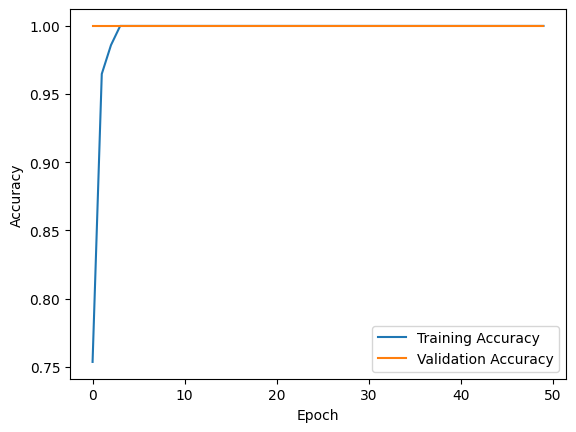

In [ ]:
lstm_model_resnet = build_and_train_lstm_model_inception(train_data_resnet[0], train_data_resnet[1],  train_labels_resnet,
                                   test_data_resnet[0], test_data_resnet[0], test_labels_resnet)

In [ ]:
# save the model in a folder path
folder_path = "/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/Trained-Model/lstm_model_resnet50.h5"
lstm_model_resnet.save(folder_path,save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Inference
# Load the trained model
model_resnet = tf.keras.models.load_model('/content/gdrive/MyDrive/Video-Metadata-Classification/ISRO-VideoClassification/Labeled-Dataset/Trained-Model/lstm_model_resnet50.h5')  # Replace 'model_path' with the actual path to your trained model

# Perform inference with the model
predictions_resnet = model_inception.predict([infer_data_inception,infer_mask_inception])

# Get the class label with the highest probability
predicted_class = np.argmax(predictions_resnet)

# Assuming you have a list of class labels, get the class name
class_labels = ['Launch', 'Logo', 'Person-Close-Up']  # Replace with your actual class labels
predicted_class_name = class_labels[predicted_class]

print(f'Predicted Class: {predicted_class_name}')

1/1 [==============================] - 1s 1s/step
Predicted Class: Launch
